# Reducción de la dimensionalidad

por  Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

## Introducción

La reducción de dimensionalidad es una **técnica de aprendizaje no supervisada.**

Sin embargo, se puede utilizar como un paso de preprocesamiento de transformación de datos para algoritmos de aprendizaje automático en conjuntos de datos de modelado predictivo de clasificación y regresión con algoritmos de aprendizaje supervisado.

Hay muchos algoritmos de reducción de dimensionalidad entre los que elegir y no existe el mejor algoritmo para todos los casos. En cambio, es una buena idea explorar una variedad de algoritmos de reducción de dimensionalidad y diferentes configuraciones para cada algoritmo.


La reducción de dimensionalidad se refiere a técnicas para reducir el número de variables de entrada en los datos de entrenamiento.

Cuando se trata de datos de alta dimensión, a menudo es útil reducir la dimensionalidad proyectando los datos a un subespacio de dimensiones inferiores que captura la 'esencia' de los datos. 

## Justificación para usar Reducción de la dimensionalidad

* Menos dimensiones de entrada a menudo significa, en consecuencia, menos parámetros o una estructura más simple en el modelo de aprendizaje automático, lo que se conoce como grados de libertad. Es probable que un modelo con demasiados grados de libertad se adapte demasiado al conjunto de datos de entrenamiento y no funcione bien con datos nuevos. *Es deseable tener modelos simples que generalicen bien*.

* La reducción de dimensionalidad es una técnica de preparación de datos que se realiza sobre los datos antes del modelado. Puede realizarse después de la limpieza y el escalado de datos y antes de entrenar un modelo predictivo.

Nota: Como tal, cualquier reducción de dimensionalidad realizada en los datos de entrenamiento también debe realizarse en datos nuevos, como un conjunto de datos de prueba, un conjunto de datos de validación y datos al hacer una predicción con el modelo final .

## [Algoritmos de reducción de dimensionalidad](https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/)

* Métodos de álgebra lineal: Los métodos de factorización matricial extraídos del campo del álgebra lineal se pueden utilizar para la dimensionalidad.

  - Análisis de componentes principales (PCA)
  - Valor singular de descomposición (SVD)
  - Factorización matricial no negativa

* Métodos de aprendizaje basados en proyección: Los métodos de aprendizaje múltiple buscan una proyección de menor dimensión de la entrada de alta dimensión que captura las propiedades sobresalientes de los datos de entrada.

 - Isomap Embedding
 - Embedding localmente lineal
 - Escalamiento multidimensional

Cada algoritmo ofrece un enfoque diferente al desafío de descubrir relaciones naturales en los datos en dimensiones inferiores.

No existe el mejor algoritmo de reducción de dimensionalidad ni una forma fácil de encontrar el mejor algoritmo para sus datos sin utilizar experimentos controlados.

In [ ]:
import pandas as pd
import numpy as np

# read in the data
url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/hitters.csv'
hitters = pd.read_csv(url)

# remove rows with missing values
hitters.dropna(inplace=True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
# encode categorical variables as integers
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [ ]:
# define features: exclude career statistics (which start with "C") and the response (Salary)
feature_cols = hitters.columns[hitters.columns.str.startswith('C') == False].drop('Salary')
feature_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [ ]:
# define X and y
X = hitters[feature_cols]
y = (hitters.Salary > 425).astype(int)
X.shape

(263, 13)

In [ ]:
y.value_counts()

0    134
1    129
Name: Salary, dtype: int64

Regresión logística usando todos los datos

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.699 (0.077)


*Objetivo:* Cada método de reducción de dimensionalidad se configurará para reducir las 13 columnas de entrada a 4 cuando sea posible.
Además, se usará un [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) para combinar la transformación de datos y el modelo en una unidad atómica que se puede evaluar mediante el procedimiento de validación cruzada.

## Métodos de álgebra lineal


### Análisis de componentes principales ([PCA](https://www.keboola.com/blog/pca-machine-learning))

El análisis de componentes principales, o PCA, podría ser la técnica más popular para la reducción de la dimensionalidad con datos densos (pocos valores cero).

En resumen lo que hace el algoritmo es:

* Estandarizar los datos de entrada (ó Normalización de las Variables)
* Obtener los autovectores y autovalores de la matriz de covarianza
* Ordenar los autovalores de mayor a menor y elegir los “k” autovectores que se correspondan con los autovectores “k” más grandes (donde “k” es el número de dimensiones del nuevo subespacio de características).
* Construir la matriz de proyección W con los “k” autovectores seleccionados.
* Transformamos el dataset original “X estandarizado” vía W para obtener las nuevas características k-dimensionales.


La biblioteca scikit-learn proporciona la implementación de la clase PCA de Análisis de Componentes Principales que puede ser utilizada como una transformación de datos de reducción de dimensionalidad. El argumento "n_componentes" se puede establecer para configurar el número de dimensiones deseadas en la salida de la transformación.




In [ ]:
from sklearn.decomposition import PCA
#Instanciamos objeto PCA y aplicamos

pca=PCA(n_components=2) 
pca.fit(X) # obtener los componentes principales
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
# con 2 componentes tenemos algo mas del 88% de varianza explicada

shape of X_pca (263, 2)
[0.65308373 0.23218912]
suma: 0.8852728560933706


In [ ]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=4) 
# Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X) # obtener los componentes principales
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 8 componentes tenemos algo mas del 99% de varianza explicada
 

shape of X_pca (263, 4)
[0.65308373 0.23218912 0.10832461 0.0024522 ]
suma: 0.9960496635334555


shape of X_pca (263, 12)
[6.53083735e-01 2.32189121e-01 1.08324606e-01 2.45220139e-03
 1.79933778e-03 1.21682630e-03 5.16342804e-04 1.83786878e-04
 1.40902828e-04 8.75816379e-05 3.37661021e-06 1.91545476e-06]
suma: 0.9978490013100499


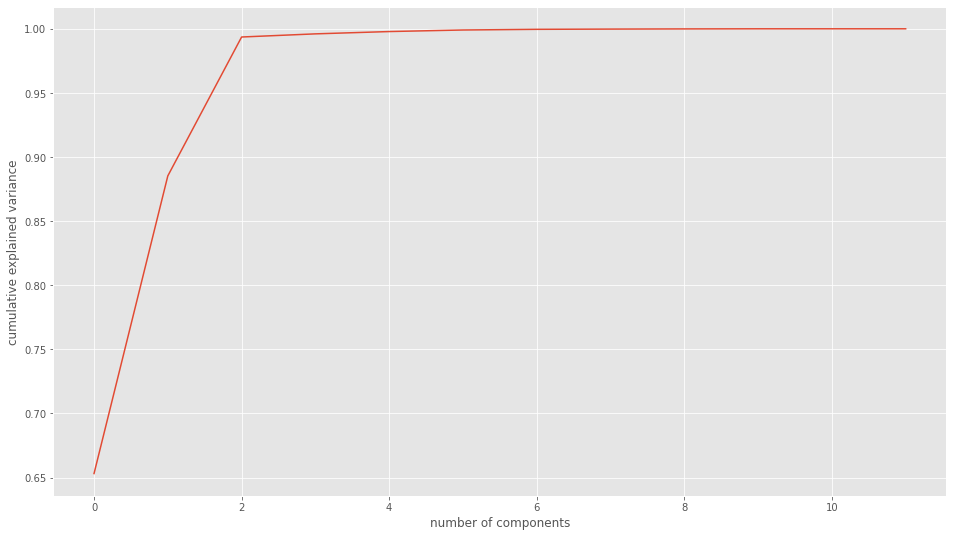

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=12) 
# Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X) # obtener los componentes principales
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 8 componentes tenemos algo mas del 99% de varianza explicada
 

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# define the pipeline
steps = [('pca', PCA(n_components=4)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.701 (0.107)


**Ventajas de PCA:**

* Fácil de calcular: PCA se basa en álgebra lineal, que es computacionalmente fácil de resolver por computadora.
* Acelera otros algoritmos de aprendizaje automático: Los algoritmos de aprendizaje automático convergen más rápido cuando se entrenan en componentes principales en lugar del conjunto de datos original.
* Contrarresta los problemas de los datos de alta dimensión: Los datos de alta dimensión hacen que los algoritmos basados ​​en regresión se sobreajustan fácilmente. Al usar PCA de antemano para reducir las dimensiones del conjunto de datos de entrenamiento, evitamos que los algoritmos predictivos se sobreajuste. 

**Desventajas de PCA:**

* Baja interpretabilidad de los componentes principales: Los componentes principales son combinaciones lineales de las características de los datos originales, pero no son tan fáciles de interpretar. Por ejemplo, es difícil saber cuáles son las características más importantes del conjunto de datos después de calcular los componentes principales. 
* El compromiso entre la pérdida de información y la reducción de la dimensionalidad: Aunque la reducción de la dimensionalidad es útil, tiene un costo. La pérdida de información es una parte necesaria de la PCA. Lamentablemente, equilibrar la reducción de la dimensionalidad y la pérdida de información es un compromiso necesario que tenemos que hacer al utilizar PCA.



### [Valor singular de descomposición](https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2)
La descomposición de valores singulares, o SVD, es una de las técnicas más populares para la reducción de dimensionalidad de datos escasos (datos con muchos valores cero). SVD es simil un r para Análisis de Componentes Principales (PCA), pero más general. PCA asume que la matriz cuadrada de entrada, SVD no tiene esta suposición.

La descomposición de valores singulares (SVD), un método de álgebra lineal que se ha utilizado generalmente como una técnica de reducción de dimensionalidad en el aprendizaje automático. SVD es una técnica de factorización matricial, que reduce el número de características de un conjunto de datos al reducir la dimensión espacial de la dimensión N a la dimensión K (donde $K<N$ ). 

En el contexto del sistema de recomendación, el SVD se utiliza como una técnica de filtrado colaborativo. Utiliza una estructura matricial en la que cada fila representa a un usuario y cada columna representa un elemento. Los elementos de esta matriz son las calificaciones que los usuarios otorgan a los elementos.

[Ejemplo de aplicación en sistemas de recomendación](https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=2)
svd.fit(X)
X_svd=svd.transform(X) 
 
print("shape of X_svd", X_svd.shape)
expl = svd.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_svd (263, 2)
[0.48370945 0.38537522]
suma: 0.8690846677230484


In [ ]:
svd=TruncatedSVD(n_components=4)
svd.fit(X)
X_svd=svd.transform(X) 
 
print("shape of X_svd", X_svd.shape)
expl = svd.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_svd (263, 4)
[0.48370945 0.38537522 0.1242437  0.0024539 ]
suma: 0.9957822707800137


shape of X_svd (263, 12)
[4.83709451e-01 3.85375217e-01 1.24243702e-01 2.45390124e-03
 1.87949970e-03 1.36114107e-03 5.22803284e-04 1.91755486e-04
 1.68994945e-04 8.76073716e-05 3.61391103e-06 2.04515528e-06]
suma: 0.9976617704750796


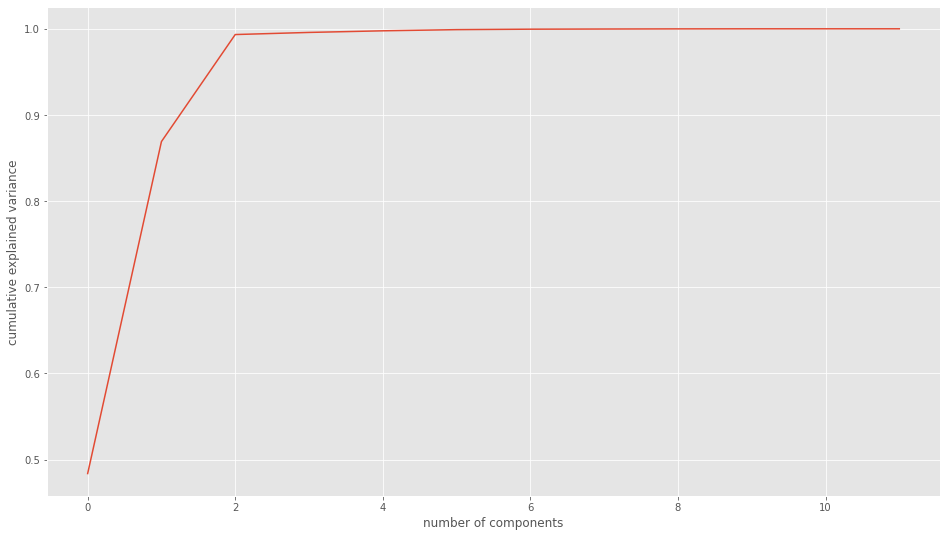

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svd=TruncatedSVD(n_components=12)
svd.fit(X)
X_svd=svd.transform(X) 
 
print("shape of X_svd", X_svd.shape)
expl = svd.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
 

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [ ]:
from sklearn.decomposition import TruncatedSVD

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=4)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.701 (0.107)


### Análisis discriminante lineal

El análisis discriminante lineal, o LDA, es un algoritmo de clasificación de clases múltiples que se puede utilizar para la reducción de dimensionalidad.

El número de dimensiones para la proyección está limitado a 1 y C-1, donde C es el número de clases. En este caso, nuestro conjunto de datos es un problema de clasificación binaria (dos clases), lo que limita el número de dimensiones a 1.

Similar a PCA pero además de buscar las componentes que maximizan la
varianza de los datos, es de interés encontrar los ejes que maximizan la
separación entre las clases.

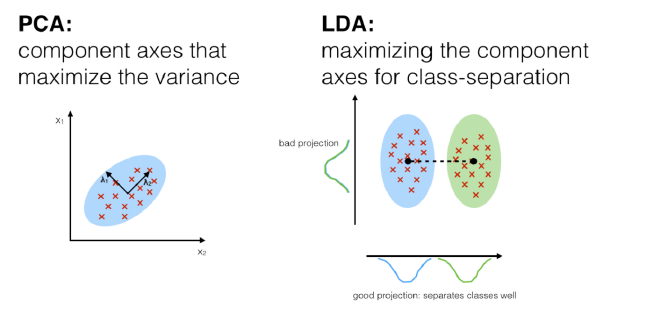

**Nota:** 
* PCA: Algoritmo No Supervisado.
* LDA: Algoritmo Supervisado.


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.802 (0.042)


[Comparación entre PCA y LDA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

El PCA aplicado a estos datos identifica la combinación de atributos (componentes principales, o direcciones en el espacio de características) que explican la mayor varianza de los datos. Aquí representamos las diferentes muestras en los 2 primeros componentes principales.

El análisis discriminante lineal (LDA) trata de identificar los atributos que explican la mayor parte de la varianza entre las clases. En concreto, el LDA, a diferencia del PCA, es un método supervisado que utiliza etiquetas de clase conocidas.

## Métodos de aprendizaje basados en proyección

### Incrustación de Isomap
Isomap Embedding, o [Isomap](https://towardsdatascience.com/what-is-isomap-6e4c1d706b54), crea una incrustación del conjunto de datos e intenta preservar las relaciones en el conjunto de datos. Isomap es la abreviatura de Isometric Mapping. El objetivo de este mapeo es mantener una distancia geodésica entre dos puntos. La geodésica se define más formalmente como el camino más corto en la propia superficie. Al comprender las distancias geodésicas entre pares, Isomap pretende aproximar la geometría de los datos antes de proyectarlos hacia la dimensión especificada. Isomap opera en 3 pasos principales: 
1. Construir un gráfico de vecindad, normalmente mediante k-Nearest Neighbors
2. Calcular los caminos más cortos entre los puntos, ya sea mediante el algoritmo de Dijkstra o el de Floyd-Warshall.
3. Construir una incrustación d-dimensional mediante una descomposición parcial de valores propios (es decir, tomando los d mayores valores propios del núcleo.





In [ ]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/635/1*28QBfjsThGbIU1jX9qBGyg.png", width=700)


In [ ]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/380/1*URB2xoIyPfXvoUh4VhPbBg.png", width=600)

In [ ]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/380/1*URB2xoIyPfXvoUh4VhPbBg.png", width=600)

In [ ]:
from sklearn.manifold import Isomap

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('iso', Isomap(n_components=4)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Exactitud: 0.859 (0.029)


### Incrustación localmente lineal (LLE)
La incrustación lineal local (LLE), crea una incrustación del conjunto de datos e intenta preservar las relaciones entre los vecindarios en el conjunto de datos.

El algoritmo LLE es un método no supervisado para la reducción de dimensionalidad. Intenta reducir estas n-Dimensiones mientras intenta preservar las características geométricas de la estructura original de características no lineales. Por ejemplo, en la siguiente ilustración, moldeamos la estructura del rollo suizo en un plano dimensional inferior, manteniendo su estructura geométrica.

In [1]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/200/0*PtwC2IuDCWTA2sDa.gif", width=600)

In [ ]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/200/0*aqDuC5VvCSSck6UY.gif", width=600)

#### Estándar

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=4, n_neighbors=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.731 (0.053)


#### Modificado

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=4, method='modified', n_neighbors=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.831 (0.028)


#### Hessian

Éste metodo requiere que n_neighbors > n_components * (1 + (n_components + 1 / 2))

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=4, method='hessian', n_neighbors=20,eigen_solver='dense')), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.742 (0.129)


#### LTSA

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=4, method='ltsa', n_neighbors=20,eigen_solver='dense')), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.743 (0.127)


### Escalamiento multidimensional

La escalamiento multidimensional ([MDS](https://medium.datadriveninvestor.com/the-multidimensional-scaling-mds-algorithm-for-dimensionality-reduction-9211f7fa5345)), es una técnica estadística que se origina en la psicometría. Los datos utilizados para el escalado multidimensional (MDS) son diferencias entre pares de objetos.
El principal objetivo de MDS es representar estas diferencias como distancias entre puntos en un espacio de baja dimensión tal que las distancias correspondan como lo más cerca posible a las diferencias.



[Ejemplo MDS](https://chart-studio.plotly.com/create/?fid=SolClover:113#/)

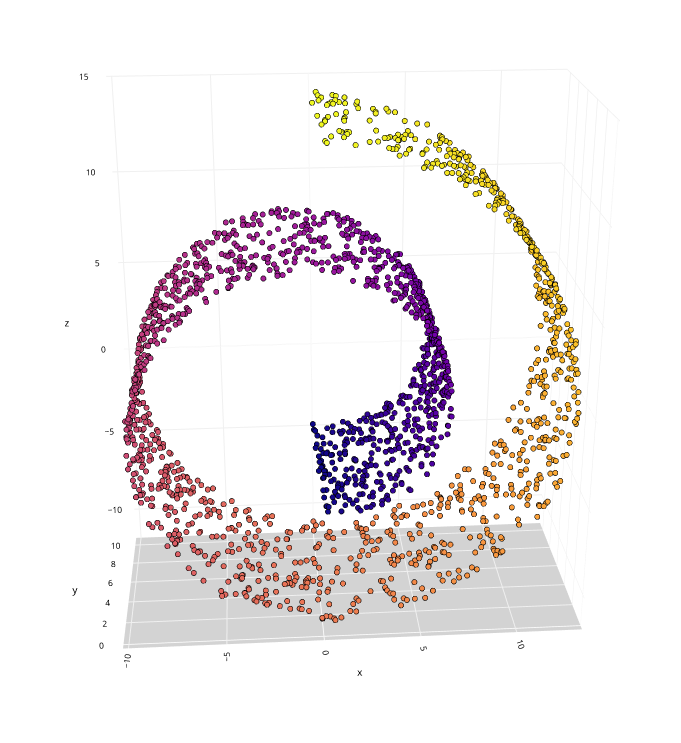

In [ ]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/700/1*KJOXTL6LR0upj5vc95-S_Q.png", width=900)

In [ ]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/700/1*mXnhfuDAqxqyRLDKyLiCCw.png", width=900)

In [ ]:
from sklearn.manifold import MDS

model2d=MDS(n_components=2, 
          metric=True, 
          n_init=4, 
          max_iter=300, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')

X_trans = model2d.fit_transform(X)


In [ ]:
model = LogisticRegression()
cv = KFold(n_splits=10, random_state=1, shuffle = True)
n_scores = cross_val_score(model, X_trans, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Exactitud: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Exactitud: 0.793 (0.034)


In [ ]:
from IPython.display import Image
Image(url= "https://scikit-learn.org/stable/_images/sphx_glr_plot_manifold_sphere_001.png", width=900)

### Tipos de distancias

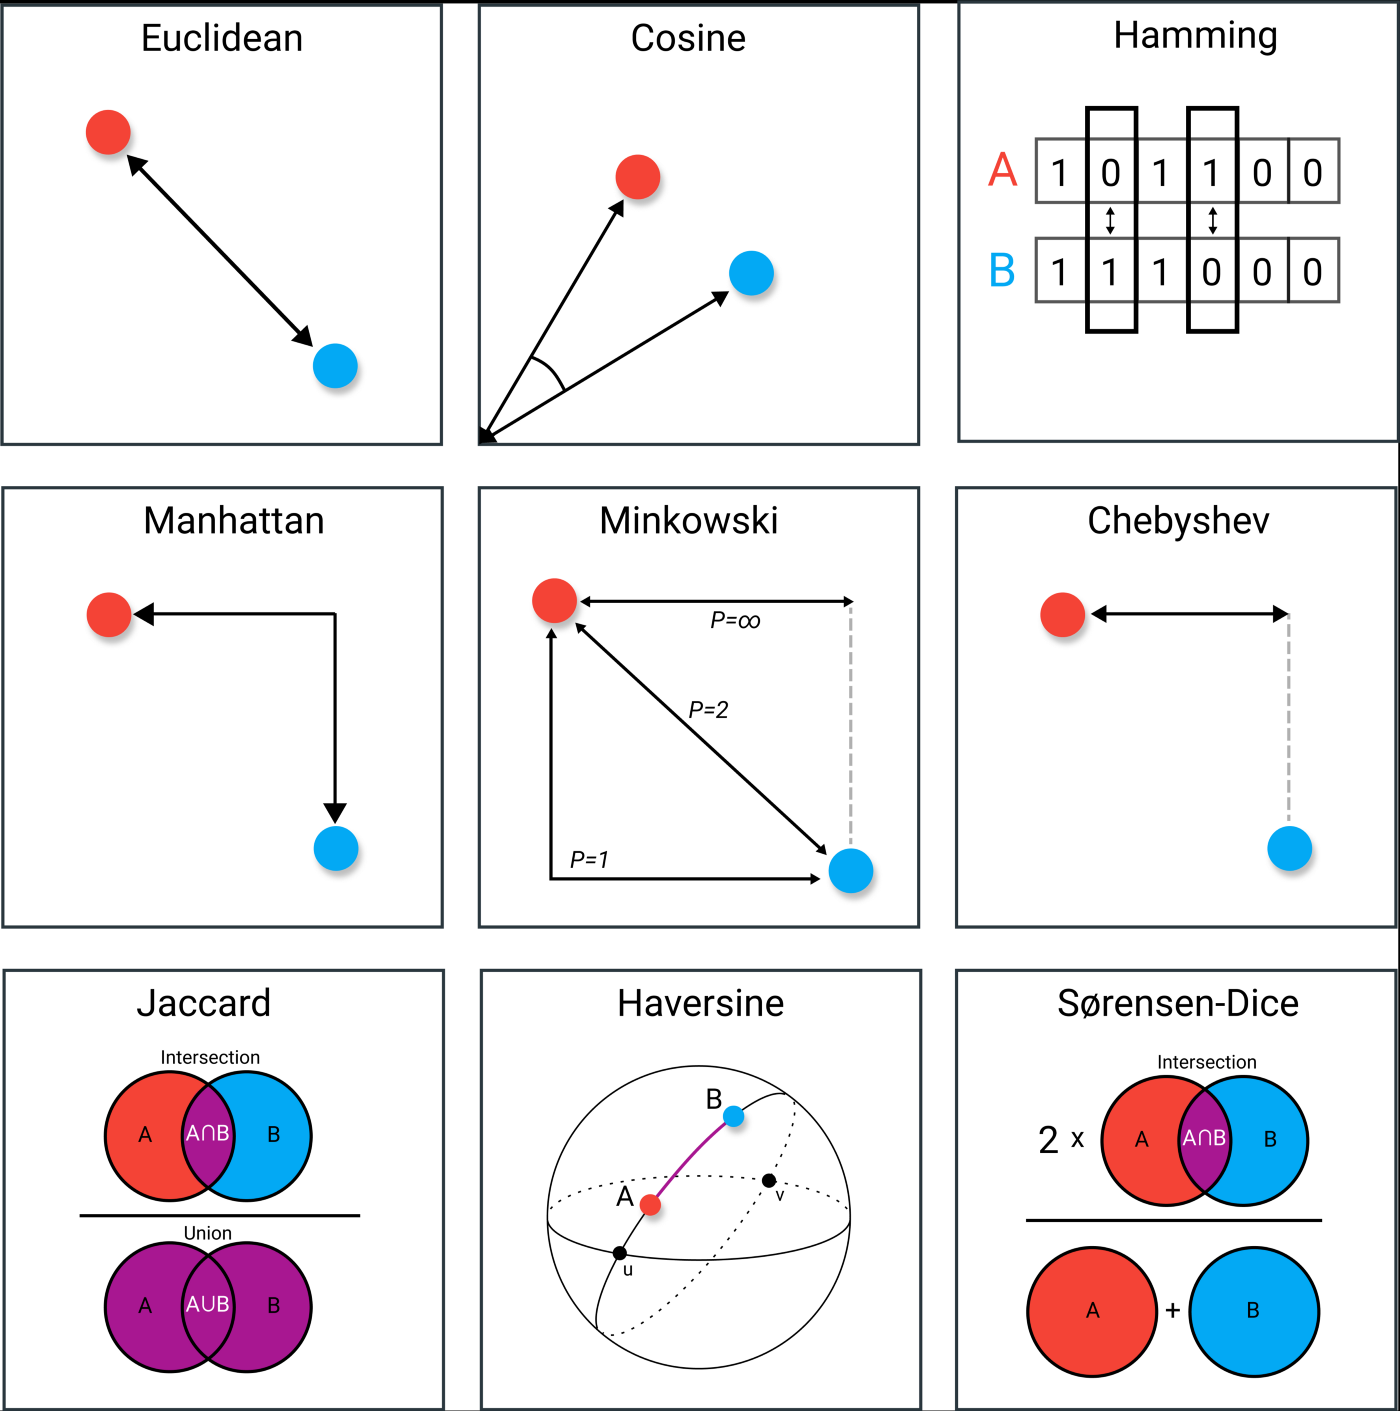

## Resumen



Intrínsecamente, se puede pensar que la transformación lineal está cambiando y estirando los datos, y la transformación no lineal hará cambios más dramáticos en los datos, como hacer que los datos estén "al revés". 



In [ ]:
from IPython.display import Image
Image(url= "https://i.stack.imgur.com/r20CB.png", width=900)

In [ ]:
from IPython.display import Image
Image(url= "https://i.stack.imgur.com/oiPVy.png", width=900)

In [ ]:
from IPython.display import Image
Image(url= "https://www.researchgate.net/profile/Manal-Al-Ghamdi/publication/308747165/figure/fig20/AS:669019145256965@1536518002268/A-taxonomy-of-dimensionality-reduction-techniques-Figure-taken-from-van-der-Maaten-et.png", width=900)

[Fuente imagen](https://www.researchgate.net/figure/A-taxonomy-of-dimensionality-reduction-techniques-Figure-taken-from-van-der-Maaten-et_fig20_308747165)